# DBSCAN: Density-based Spatial Clustering of Applications with Noise

Written by Nicolas VIOLOT

## 1. General Introduction

In our previous clustering courses, we dealt with K-Means and Hierarchical Clustering algorithms.

When it comes to K-Means, we can qualify this technique as not being computationally demanding. It is, in fact, quite a simple and effective algorithm with the right data. Unfortunately, one of the problems we face with K-Means is that it's not ideal when we don't know the number of clusters we are looking for. This is because K-Means requires the number of clusters to be specified before the algorithm runs. Additionally, K-Means tends to perform poorly with clusters of arbitrary shapes, as it assumes all clusters are spherical and equally sized. This makes it unlikely to handle clusters of varying shapes and densities well.

On the other hand, Hierarchical Clustering separates the data into groups and merges them until we end up with the whole dataset in a single cluster. There are two main types of Hierarchical Clustering: agglomerative (bottom-up) and divisive (top-down). Agglomerative clustering starts with each data point as its own cluster and iteratively merges the closest pairs of clusters. Divisive clustering, in contrast, starts with the entire dataset as one cluster and splits it into smaller clusters. While this technique can be useful and provides a detailed clustering hierarchy, its computational complexity makes it undesirable for large datasets. The time complexity of Hierarchical Clustering is typically $O(n^3)$, which can be prohibitive for large datasets.

The technique that we are going to see, called DBSCAN (Density-Based Spatial Clustering of Applications with Noise), uses density to cluster data points. The approach is intuitive as it is similar to how the human eye would categorize and group individuals at first glance. DBSCAN identifies clusters based on the density of data points, grouping closely packed points into clusters and marking points that lie alone in low-density regions as outliers or noise. This makes DBSCAN particularly effective for discovering clusters of arbitrary shapes and sizes, as it does not assume any prior knowledge of the number of clusters and can handle noise effectively.

## 2. What, why, how?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm introduced by Ester et al. in 1996. It is designed to identify clusters of any shape in a dataset that may contain noise and outliers.

The basic idea behind the density-based clustering approach is derived from a human intuitive clustering method. For instance, by looking at a scatter plot, one can easily identify clusters along with several points of noise due to the differences in the density of points between the visual clusters.

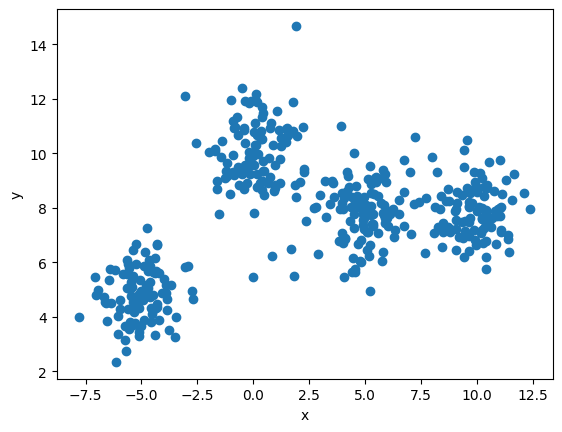

Clusters are dense regions in the data space, separated by regions with a lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point in a cluster, the neighborhood of a given radius must contain at least a minimum number of points.

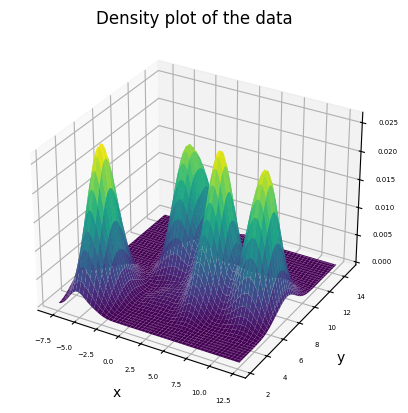

As mentioned above, DBSCAN is robust to any shape and can handle outliers quite well.

In K-Means and Hierarchical Clustering, every data point must be assigned to a cluster. This means that even if a point is far away from clusters X and Y, it has to be grouped with the closest one. This creates irrelevant clusters and inevitably affects the centroids, which are attracted toward those outliers in the case of K-Means. This issue is particularly problematic because it distorts the true structure of the data.

This problem is called noise. DBSCAN can avoid noisy data points by simply not clustering them, as they are not considered 'core points'. The algorithm has two hyperparameters: ε (epsilon) and MinPts, which define the radius around each point to calculate the density and the minimum number of points required within this radius to be considered a core point, respectively.

1. `ε` (epsilon): This is the radius of the neighborhood around a point. If another point lies within this radius, it is considered a neighbor.

2. `MinPts`: This is the minimum number of neighboring points (including the point itself) within the radius ε for a point to be classified as a core point.


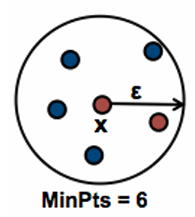


A point is classified as a:

- Core Point: If it has at least MinPts points within its ε-neighborhood.
- Border Point: If it is within the ε-neighborhood of a core point but has fewer than MinPts neighbors itself.
- Noise Point: If it is neither a core point nor a border point, meaning it does not satisfy the density requirement.

This approach allows DBSCAN to detect clusters of any shape as connections are made between core points. Furthermore, the number of clusters is not a hyperparameter. Instead, the algorithm discovers the number of clusters based on the density parameters provided by the user (ε and MinPts). This automatic determination of the number of clusters makes DBSCAN particularly powerful and flexible for a wide range of applications where the number of clusters is not known a priori.

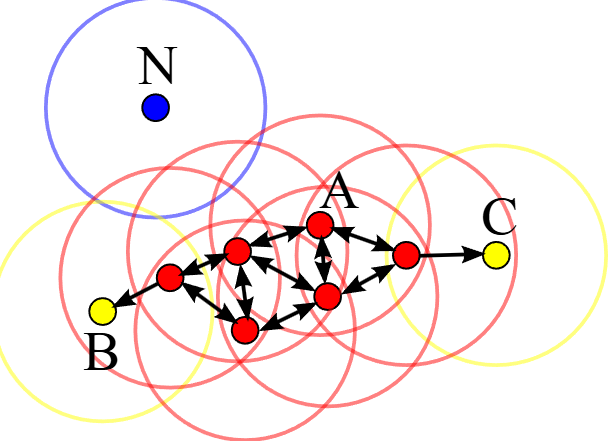

Here, A is a `core point`, B & C are `border points` and N is a `noise point`.

## 3. Theoretical details

### Graph approach

One way of understanding the algorithm, is by looking at the problem as a graph and points as nodes. Let's see how one can travel through this graph.

- `Core points`: Let two core points X and Y. One can travel from X to Y and back from Y to X. This is called `Connectivity`.
- `Border points`: A border point can only be reached from a core point. On the other hand, one cannot travel from this border point. This is called `Reachability`.
- `Noise points`: These points are not reachable from any other point. They are isolated.

Let's see how the algorithm works:

1. Choose a random core point.
2. Assign a cluster to this point.
3. Spread the cluster by visiting all reachable points.
4. Repeat the process until all reachable points are assigned to a cluster.


Note: The algorithm is not deterministic. The order in which the points are visited can change the final result. Example: one border point can be reachable by two potential clusters. The first cluster that reaches this point will assign it to its cluster.

![Algorithm graph](https://cdn-images-1.medium.com/v2/resize:fit:640/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

### Calculus approach

Once we have seen the graph approach, we can imagine another way of performing the algorithm, which is easier to visualize. First, we know that DBSCAN uses density to cluster data points. Let's use the plot we saw before to visualize how density works.

1. What is Density?

The density of a point is the number of points within a specified radius 𝜖. If we assign a color ranging from deep blue to neon yellow (no neighbors to many neighbors), we can see that the density is higher in the center of the clusters and lower at the edges.

In our demonstration, our data belongs to a 2-dimensional space. We can imagine a 3-dimensional space where the third dimension represents density. This way, we can visualize the density of each point in the dataset. Let's try to change the radius 𝜖 and see how the density changes.

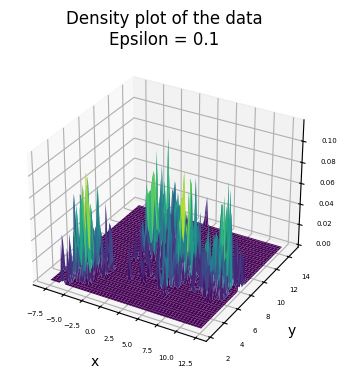 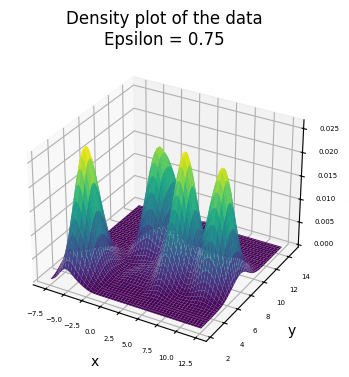 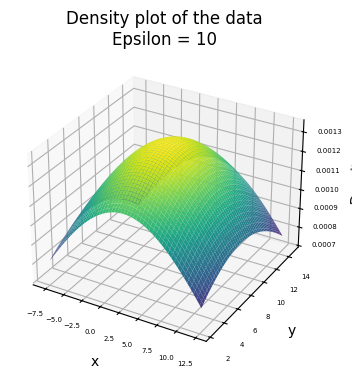

As we can see, the number of density "spikes" increases as the radius 𝜖 decreases. This is because, as we decrease the radius, fewer points are considered neighbors, resulting in more groups of individual points.
Conversely, when the radius 𝜖 is large, more points are considered neighbors, and the density appears more uniform.

2. Now, what about MinPts ?

The MinPts parameter is the minimum number of points required within the radius to be considered a core point. With our 3D visualization, we could imagine a horizontal plane, fixed on the z-axis, that would cut through the density plot. This plane represents the MinPts parameter.

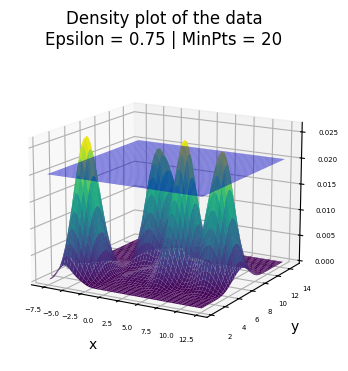 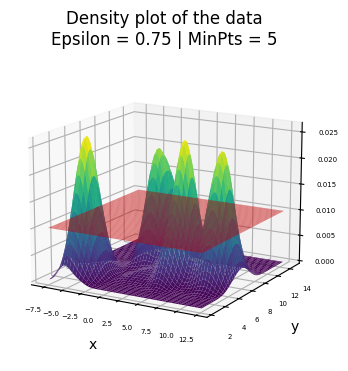 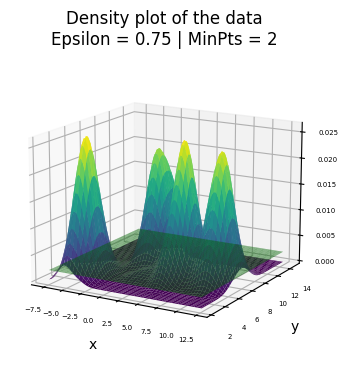

As the plane moves higher on the z-axis, the MinPts parameter increases. A high MinPts means that we only consider points with a high-density neighborhood as core points. This way, we can avoid noise and outliers (depicted by the purple color in the plot).
On the other hand, the plane moves down on the z-axis as MinPts decreases. This is because we allow points with lower-density neighborhoods to be considered core points.

Finally, we understand that the density spikes above the plane form clusters, while points below the plane are considered noise.

To summarize, the radius 𝜖 and MinPts can be visually represented in an N+1-dimensional space where the N dimensions are the data dimensions, and the last dimension is the density of the points.

- 𝜖 affects how many spikes we have in the density plot.
- MinPts affects the height of the horizontal plane.

Once we have set these two parameters, we can determine the number of clusters by counting the closed density spikes above the plane.

## 4. Pros & Cons

- Pros of DBSCAN

1. **No Need to Specify the Number of Clusters**:
   One of the main advantages of DBSCAN is that it does not require the number of clusters to be specified in advance. Unlike K-Means, where the number of clusters must be predetermined, DBSCAN discovers clusters based on the density of the data, making it more flexible and user-friendly in scenarios where the number of clusters is unknown.

2. **Ability to Identify Arbitrary Shaped Clusters**:
   DBSCAN can identify clusters of arbitrary shapes and sizes, which is a significant improvement over algorithms like K-Means that assume spherical clusters. This makes DBSCAN particularly useful for datasets with complex cluster shapes.

3. **Handling Noise and Outliers**:
   DBSCAN effectively handles noise and outliers by labelling points that do not belong to any cluster as noise. This is beneficial in real datasets that often contain outliers that can distort the results of other clustering algorithms.

4. **Scalability with Large Datasets**:
   DBSCAN is efficient for large datasets, especially when spatial indexing techniques (like k-d trees or R-trees) are used. This makes it suitable for large-scale data mining applications.

5. **Minimal Parameter Tuning**:
   DBSCAN only requires two parameters: 𝜖, the radius to determine the neighborhood, and MinPts, the minimum number of points required to form a dense region. With some domain knowledge and cross-validation, these parameters can be set effectively, avoiding the complexity of tuning numerous parameters.

- Cons of DBSCAN

1. **Parameter Sensitivity**:
   While DBSCAN has only two parameters, the results can be highly sensitive to the choice of 𝜖 and MinPts. Selecting inappropriate values for these parameters can lead to poor clustering results, such as merging distinct clusters or splitting a single cluster into multiple ones. This often requires careful parameter tuning and may not be straightforward without domain knowledge.

2. **Difficulty with Varying Densities**:
   DBSCAN struggles with datasets containing clusters of varying densities. The algorithm uses a single 𝜖 value to define the neighborhood for all points, which means it cannot effectively handle clusters that differ significantly in density. This limitation can result in the algorithm failing to identify some clusters correctly.

3. **High-Dimensional Data Challenges**:
   In high-dimensional spaces, the concept of density becomes less meaningful due to the curse of dimensionality. As the number of dimensions increases, the distance between points tends to become more uniform, making it difficult for DBSCAN to distinguish between dense and sparse regions. This can lead to suboptimal clustering performance in high-dimensional datasets.

4. **Memory Consumption**:
   For very large datasets, DBSCAN can be memory-intensive, especially if the implementation does not use efficient spatial indexing techniques. This can limit its applicability for extremely large-scale problems or environments with limited memory resources.

5. **Computational Complexity**:
   While DBSCAN is efficient with the help of spatial indexing, its computational complexity can still be a concern for extremely large datasets without such optimizations. The algorithm has a time complexity of $O(n \log n)$ with efficient indexing, but it can degrade to $O(n^2)$ in the worst case, which might be prohibitive for very large datasets.


## 5. Comparison with other similar tehcniques

Let's compare DBSCAN, K-Means, Hierarchical Clustering (HCA), and Gaussian Mixture Models (GMM).

1. **Time Complexity**

   - **K-Means**: The time complexity of K-Means is $O(n \cdot k \cdot t)$, where $n$ is the number of data points, $k$ is the number of clusters, and $t$ is the number of iterations. K-Means can be relatively fast, but the number of iterations needed can vary.
   
   - **Hierarchical Clustering (HCA)**: The time complexity of HCA is $O(n^3)$ for the general case, making it less suitable for large datasets. Some optimized implementations can reduce this to $O(n^2)$, but it remains computationally intensive.
   
   - **DBSCAN**: The time complexity of DBSCAN is $O(n \log n)$ when using efficient spatial indexing structures like k-d trees. In the worst case, it can degrade to $O(n^2)$. DBSCAN is generally efficient for large datasets with the right indexing.
   
   - **Gaussian Mixture Models (GMM)**: The time complexity of GMM is $O(n \cdot k \cdot t)$, similar to K-Means. GMM can also be computationally intensive due to the expectation-maximization steps required for convergence.

2. **Shape of Clusters**

   - **K-Means**: Assumes clusters are spherical and equally sized, which limits its ability to identify clusters of arbitrary shapes.
   
   - **Hierarchical Clustering (HCA)**: Can identify clusters of various shapes, but the results can be sensitive to the linkage criteria used (e.g., single, complete, average).
   
   - **DBSCAN**: Excels at identifying clusters of arbitrary shapes, as it relies on density rather than distance from centroids.
   
   - **Gaussian Mixture Models (GMM)**: Assumes clusters follow a Gaussian distribution, allowing for elliptical shapes but not more complex structures.

3. **Handling Noise**

   - **K-Means**: Every point is assigned to a cluster, making it susceptible to noise and outliers, which can skew the results.
   
   - **Hierarchical Clustering (HCA)**: Does not handle noise explicitly; outliers can affect the clustering structure significantly.
   
   - **DBSCAN**: Explicitly identifies and handles noise by marking points that do not fit into any cluster as outliers, making it robust to noise.
   
   - **Gaussian Mixture Models (GMM)**: Can handle noise to some extent by modeling clusters probabilistically, but it does not explicitly identify outliers.

4. **Parameter Requirements**

   - **K-Means**: Requires the number of clusters $k$ to be specified in advance. Additionally, it may require multiple runs to find the best centroids initialization.
   
   - **Hierarchical Clustering (HCA)**: Does not require the number of clusters in advance but requires a linkage criterion, which can affect the results.
   
   - **DBSCAN**: Requires two parameters: 𝜖, the radius for density calculations, and MinPts, the minimum number of points required to form a core point. These parameters significantly influence the outcome and need careful tuning.
   
   - **Gaussian Mixture Models (GMM)**: Requires the number of components (clusters) to be specified. Also, initialization and convergence criteria are important for the algorithm's performance.

5. **Scalability**

   - **K-Means**: Scalable to large datasets, especially with efficient implementations like MiniBatch K-Means.
   
   - **Hierarchical Clustering (HCA)**: Not scalable to large datasets due to its high time complexity.
   
   - **DBSCAN**: Scalable with large datasets when combined with efficient spatial indexing, though memory usage can be a concern for very large datasets.
   
   - **Gaussian Mixture Models (GMM)**: Can handle moderately large datasets but can become slow with very large datasets due to the iterative nature of the expectation-maximization algorithm.

## 6. Application

### We will perform Image Segmentation using DBSCAN

Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Preprocess the data

In [4]:
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import gaussian

def preprocess_img(img: np.ndarray) -> np.ndarray:
    """Preprocess the image

    Args:
        img (np.ndarray): Image to preprocess

    Returns:
        np.ndarray: Preprocessed image
    """
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.title("Original")
    plt.imshow(img)

    plt.subplot(1,4,2)
    plt.title("Grayscale")
    img = rgb2gray(img)
    plt.imshow(img)

    plt.subplot(1,4,3)
    plt.title("Downscaled")
    img = img[::2, ::2]
    plt.imshow(img)

    plt.subplot(1,4,4)
    plt.title("Gaussian Blur")
    img = gaussian(img, sigma=1)
    plt.imshow(img)

    return img

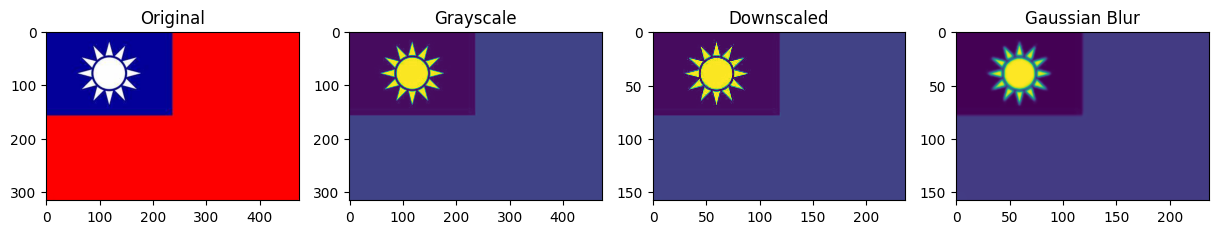

In [5]:
IMG_URL = "https://th.bing.com/th/id/OIP.CVZdzDidOF3xbidvRX0z7wHaE8?rs=1&pid=ImgDetMain"
img = io.imread(IMG_URL)
preprocessed_img = preprocess_img(img)

Perform DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [6]:
preprocessed_img.shape

(158, 237)

In [8]:
X = preprocessed_img.reshape(-1, 1)

In [9]:
dbscan = DBSCAN(eps=0.025, min_samples=500)
dbscan.fit(X)
print("Number of clusters: ", len(set(dbscan.labels_)))

Number of clusters:  4


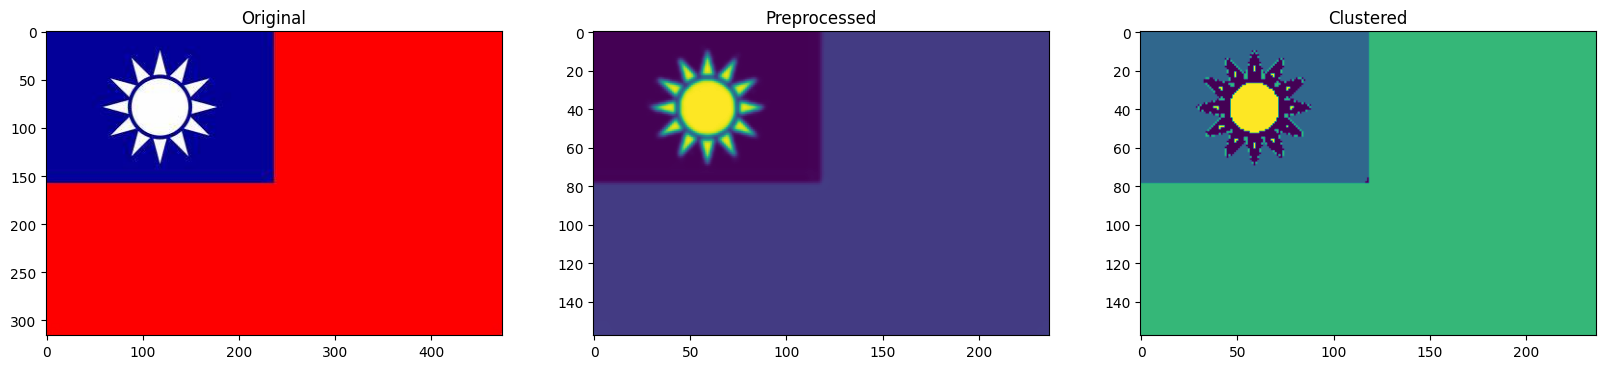

In [10]:
to_plot = np.zeros(preprocessed_img.shape)

for i in range(preprocessed_img.shape[0]):
    for j in range(preprocessed_img.shape[1]):
        to_plot[i, j] = dbscan.labels_[
            preprocessed_img.shape[1] * i + j]

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.title("Preprocessed")
plt.imshow(preprocessed_img)

plt.subplot(1, 3, 3)
plt.title("Clustered")
plt.imshow(to_plot)